In [ ]:
import pandas as pd
dataset = pd.read_csv("Featured-Dataset.csv")
dataset = dataset.dropna()
dataset = dataset.drop(columns=['password'])
dataset

,count,length,common,alpha-count,numeric-count,special-count,uppercase,lowercase,sequential-pattern,repeated-characters,case-ratio
0,13,9.0,0,8,1,0,0,1,1,1,0.0
1,13,8.0,0,4,4,0,0,1,0,0,0.0
2,13,11.0,0,5,6,0,1,0,0,0,0.0
3,13,8.0,0,6,2,0,0,1,0,0,0.0
4,13,8.0,0,8,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
684408,69,6.0,0,0,6,0,0,0,0,0,0.0
684409,69,7.0,0,1,6,0,0,1,0,0,0.0
684410,69,7.0,0,7,0,0,0,1,0,0,0.0
684411,69,11.0,0,6,5,0,0,1,0,0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting the columns that are numerical
columns = ['count', 'length', 'common', 'alpha-count', 'numeric-count', 
           'special-count', 'uppercase', 'lowercase', 'sequential-pattern', 
           'repeated-characters', 'case-ratio']

# Extracting the features for clustering
X = dataset[columns]
scaler = StandardScaler()
xScaled = scaler.fit_transform(X)

# Step 2: Apply KMeans clustering
kMeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters: 0 = weak, 1 = strong
dataset['strength'] = kMeans.fit_predict(xScaled)
dataset['strength'] = dataset['strength'].map({0: 'weak', 1: 'strong'})

print(kMeans.cluster_centers_)
dataset

   count  length  common  alpha-count  numeric-count  special-count  \
0     13     9.0       0            8              1              0   
1     13     8.0       0            4              4              0   
2     13    11.0       0            5              6              0   
3     13     8.0       0            6              2              0   
4     13     8.0       0            8              0              0   

   uppercase  lowercase  sequential-pattern  repeated-characters  case-ratio  \
0          0          1                   1                    1         0.0   
1          0          1                   0                    0         0.0   
2          1          0                   0                    0         0.0   
3          0          1                   0                    0         0.0   
4          0          1                   0                    0         0.0   

  strength  
0   strong  
1   strong  
2     weak  
3   strong  
4   strong  


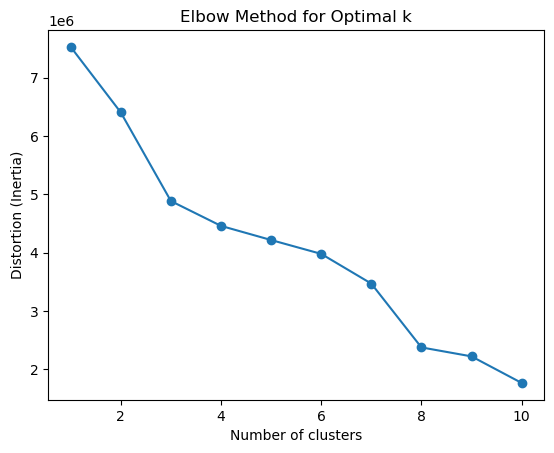

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate distortion (inertia) for a range of cluster numbers
distortions = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters=i, random_state=42)
    kMeans.fit(xScaled)
    distortions.append(kMeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
tempDataset = pd.read_csv("Featured-Dataset.csv")
passwordColumn = tempDataset['password']
dataset.insert(0, 'password', passwordColumn)
dataset

,password,count,length,common,alpha-count,numeric-count,special-count,uppercase,lowercase,sequential-pattern,repeated-characters,case-ratio,strength
0,zzzzqwer1,13,9.0,0,8,1,0,0,1,1,1,0.0,strong
1,yuna1980,13,8.0,0,4,4,0,0,1,0,0,0.0,strong
2,WERTU280505,13,11.0,0,5,6,0,1,0,0,0,0.0,weak
3,yqdiy35m,13,8.0,0,6,2,0,0,1,0,0,0.0,strong
4,movynhxk,13,8.0,0,8,0,0,0,1,0,0,0.0,strong
...,...,...,...,...,...,...,...,...,...,...,...,...,...
684408,140073,69,6.0,0,0,6,0,0,0,0,0,0.0,strong
684409,210596n,69,7.0,0,1,6,0,0,1,0,0,0.0,strong
684410,quotaji,69,7.0,0,7,0,0,0,1,0,0,0.0,strong
684411,dfkthf12345,69,11.0,0,6,5,0,0,1,0,0,0.0,strong
